## Project Goals 
Prerequisites?
- Codecademy, Netflix - Drive To Survive, Inspiration from LinkedIn Challenge poster & 2021/2022 seasons

Where data comes from?
- Kaggle Link

Questions

Name columns and their meaning to non-fans?

Find and Explain NaN values

Proof-checking resource: https://gpracingstats.com/drivers/lewis-hamilton/

In [506]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [507]:
# Read the datasets
circuits = pd.read_csv("circuits.csv")
constructors = pd.read_csv("constructors.csv")
con_standings = pd.read_csv("constructor_standings.csv")
con_results = pd.read_csv("constructor_results.csv")
drivers = pd.read_csv("drivers.csv")
dr_standings = pd.read_csv("driver_standings.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
sprints = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")

In [526]:
# Set Seaborn style
sns.color_palette("tab10")
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1)

### Prepare Data
We will print samples of the current datasets to see how they are to be joined for analysis. After this, we'll form new datasets with the prefix `full` and erase the data samples.

In [509]:
# Merge tables for drivers
full_drivers = drivers.merge(dr_standings, on="driverId", how="inner")
# Concatenate full name
full_drivers["name"] = full_drivers[["forename", "surname"]].apply(" ".join, axis=1)
# Drop the extra columns and reposition
full_drivers = full_drivers.reindex(columns=["driverId", "driverRef", "number", "code", "name", "dob", "nationality", "raceId", "points", "position", "wins"])
full_drivers

,driverId,driverRef,number,code,name,dob,nationality,raceId,points,position,wins
0,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,18,10.0,1,1
1,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,19,14.0,1,1
2,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,20,14.0,3,1
3,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,21,20.0,2,1
4,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,22,28.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
33877,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1092,2.0,21,0
33878,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1093,2.0,21,0
33879,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1094,2.0,21,0
33880,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1095,2.0,21,0


In [510]:
# Merge tables for onstructors and drop extra columns
full_constructors = constructors.merge(con_standings, on="constructorId", how="inner")\
                                .drop(columns=["url", "constructorStandingsId", "positionText"])
full_constructors                        

,constructorId,constructorRef,name,nationality,raceId,points,position,wins
0,1,mclaren,McLaren,British,18,14.0,1,1
1,1,mclaren,McLaren,British,19,24.0,1,1
2,1,mclaren,McLaren,British,20,28.0,3,1
3,1,mclaren,McLaren,British,21,34.0,3,1
4,1,mclaren,McLaren,British,22,42.0,3,1
...,...,...,...,...,...,...,...,...
12926,214,alpine,Alpine F1 Team,French,1092,143.0,4,0
12927,214,alpine,Alpine F1 Team,French,1093,149.0,4,0
12928,214,alpine,Alpine F1 Team,French,1094,153.0,4,0
12929,214,alpine,Alpine F1 Team,French,1095,167.0,4,0


In [511]:
# Merge tables for sprints and replace status with actual values
full_sprints = sprints.merge(status, on="statusId", how="inner")\
                        .drop(["resultId", "positionText", "positionOrder", "time", "statusId"], axis=1)
full_sprints

,raceId,driverId,constructorId,number,grid,position,points,laps,milliseconds,fastestLap,fastestLapTime,status
0,1061,830,9,33,2,1,3,17,1538426,14,1:30.013,Finished
1,1061,1,131,44,1,2,2,17,1539856,17,1:29.937,Finished
2,1061,822,131,77,3,3,1,17,1545928,17,1:29.958,Finished
3,1061,844,6,16,4,4,0,17,1549704,16,1:30.163,Finished
4,1061,846,1,4,6,5,0,17,1562537,16,1:30.566,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1065,842,213,10,6,\N,0,0,\N,\N,\N,Accident
116,1077,855,51,24,0,\N,0,0,\N,\N,\N,Retired
117,1095,848,3,23,11,\N,0,12,\N,4,1:15.998,Retired
118,1084,20,117,5,20,19,0,21,\N,4,1:10.317,Collision damage


In [512]:
# Merge only relevant columns from races and circuits
full_races = pd.merge(races[["raceId", "year", "round", "circuitId", "name", "date"]],\
                        circuits[["circuitId", "circuitRef", "location", "country"]], on="circuitId", how="inner")\
                            .drop("circuitId", axis=1)
full_races = full_races.rename(columns={"name": "circuitName"})
full_races

,raceId,year,round,circuitName,date,circuitRef,location,country
0,1,2009,1,Australian Grand Prix,2009-03-29,albert_park,Melbourne,Australia
1,18,2008,1,Australian Grand Prix,2008-03-16,albert_park,Melbourne,Australia
2,36,2007,1,Australian Grand Prix,2007-03-18,albert_park,Melbourne,Australia
3,55,2006,3,Australian Grand Prix,2006-04-02,albert_park,Melbourne,Australia
4,71,2005,1,Australian Grand Prix,2005-03-06,albert_park,Melbourne,Australia
...,...,...,...,...,...,...,...,...
1074,1054,2021,3,Portuguese Grand Prix,2021-05-02,portimao,Portimão,Portugal
1075,1051,2021,20,Qatar Grand Prix,2021-11-21,losail,Al Daayen,Qatar
1076,1072,2021,21,Saudi Arabian Grand Prix,2021-12-05,jeddah,Jeddah,Saudi Arabia
1077,1075,2022,2,Saudi Arabian Grand Prix,2022-03-27,jeddah,Jeddah,Saudi Arabia


### Explore Data

Now, that we have our base datasets ready, we can start investigating the ropes of the data and prepare it for visualization.


In [513]:
# Get the initial understanding of the total number of unqiue drivers represented
print(f"Total number of unique drivers: {full_drivers.name.nunique()}")

Total number of unique drivers: 848


In [514]:
# Find out the distribution between nationalities
full_drivers.groupby("nationality").name.nunique()\
                                    .nlargest(15).reset_index()\
                                        .rename(columns={"name": "count"})

,nationality,count
0,British,164
1,American,157
2,Italian,96
3,French,72
4,German,49
5,Brazilian,32
6,Argentine,24
7,Belgian,23
8,South African,23
9,Swiss,22


In [515]:
# Find out the drivers with the highest number of wins through the years
max_wins = full_drivers.groupby("name").wins.max().sort_values(ascending=False).nlargest(15).reset_index()
max_wins

,name,wins
0,Max Verstappen,15
1,Michael Schumacher,13
2,Sebastian Vettel,13
3,Lewis Hamilton,11
4,Nigel Mansell,9
5,Nico Rosberg,9
6,Damon Hill,8
7,Ayrton Senna,8
8,Mika Häkkinen,8
9,Jim Clark,7


In [516]:
# Get the list of the names of the top 15 drivers for visualization focus
wins_name_list = list(max_wins.name)
print(wins_name_list)

['Max Verstappen', 'Michael Schumacher', 'Sebastian Vettel', 'Lewis Hamilton', 'Nigel Mansell', 'Nico Rosberg', 'Damon Hill', 'Ayrton Senna', 'Mika Häkkinen', 'Jim Clark', 'Alain Prost', 'Jacques Villeneuve', 'Fernando Alonso', 'Kimi Räikkönen', 'Alberto Ascari']


In [517]:
# Get a subset of the top drivers for more efficient analysis
winners_subset = full_drivers[full_drivers.name.isin(wins_name_list)].reset_index(drop=True)
winners_subset

,driverId,driverRef,number,code,name,dob,nationality,raceId,points,position,wins
0,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,18,10.0,1,1
1,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,19,14.0,1,1
2,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,20,14.0,3,1
3,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,21,20.0,2,1
4,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,22,28.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
3162,830,max_verstappen,33,VER,Max Verstappen,1997-09-30,Dutch,1092,366.0,1,12
3163,830,max_verstappen,33,VER,Max Verstappen,1997-09-30,Dutch,1093,391.0,1,13
3164,830,max_verstappen,33,VER,Max Verstappen,1997-09-30,Dutch,1094,416.0,1,14
3165,830,max_verstappen,33,VER,Max Verstappen,1997-09-30,Dutch,1095,429.0,1,14


In [518]:
# Merge the top drivers & races most importart columns for the next steps
drivers_races = full_drivers.merge(full_races[["raceId", "circuitName", "year", "circuitRef", "country"]], on="raceId", how="left")
drivers_races

,driverId,driverRef,number,code,name,dob,nationality,raceId,points,position,wins,circuitName,year,circuitRef,country
0,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,18,10.0,1,1,Australian Grand Prix,2008,albert_park,Australia
1,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,19,14.0,1,1,Malaysian Grand Prix,2008,sepang,Malaysia
2,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,20,14.0,3,1,Bahrain Grand Prix,2008,bahrain,Bahrain
3,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,21,20.0,2,1,Spanish Grand Prix,2008,catalunya,Spain
4,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,22,28.0,3,1,Turkish Grand Prix,2008,istanbul,Turkey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33877,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1092,2.0,21,0,Japanese Grand Prix,2022,suzuka,Japan
33878,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1093,2.0,21,0,United States Grand Prix,2022,americas,USA
33879,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1094,2.0,21,0,Mexico City Grand Prix,2022,rodriguez,Mexico
33880,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1095,2.0,21,0,Brazilian Grand Prix,2022,interlagos,Brazil


In [519]:
# Find out wins total split by season/year
winners_by_year = drivers_races.groupby(["name", "year"]).wins.max().reset_index()
# Check an example
winners_by_year[winners_by_year.name == "Max Verstappen"]

,name,year,wins
2048,Max Verstappen,2015,0
2049,Max Verstappen,2016,1
2050,Max Verstappen,2017,2
2051,Max Verstappen,2018,2
2052,Max Verstappen,2019,3
2053,Max Verstappen,2020,2
2054,Max Verstappen,2021,10
2055,Max Verstappen,2022,15


In [520]:
# Find wins total for every driver 
winners_sum = winners_subset.groupby("name").wins.sum().reset_index()
winners_sum

,name,wins
0,Alain Prost,472
1,Alberto Ascari,54
2,Ayrton Senna,394
3,Damon Hill,178
4,Fernando Alonso,346
5,Jacques Villeneuve,93
6,Jim Clark,146
7,Kimi Räikkönen,187
8,Lewis Hamilton,1019
9,Max Verstappen,361


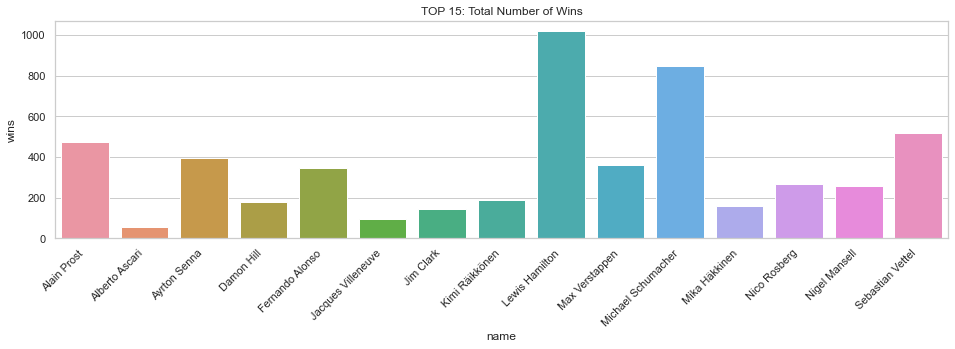

In [528]:
# Create a barplot
plt.figure(figsize=(16,4))
sns.barplot(data=winners_sum, x="name", y="wins")
plt.title("TOP 15: Total Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

In [522]:
# Get the breakdown of total points split by season/year
winners_by_points = drivers_races.groupby(["name", "year"]).points.max().reset_index()
# Check an example
winners_by_points[winners_by_points.name == "Max Verstappen"]

,name,year,points
2048,Max Verstappen,2015,49.0
2049,Max Verstappen,2016,204.0
2050,Max Verstappen,2017,168.0
2051,Max Verstappen,2018,249.0
2052,Max Verstappen,2019,278.0
2053,Max Verstappen,2020,214.0
2054,Max Verstappen,2021,395.5
2055,Max Verstappen,2022,454.0


In [523]:
# Get total points by year of 
title_winners = drivers_races.groupby(["year", "name"]).points.max().reset_index()
# Sort by points and leave only final value of season/year
title_winners = title_winners.sort_values("points", ascending=False)\
                                .drop_duplicates("year", keep="first")
# Sort by year for easier perception
title_winners_by_year = title_winners.sort_values("year", ascending=False).reset_index(drop=True)
title_winners_by_year

,year,name,points
0,2022,Max Verstappen,454.0
1,2021,Max Verstappen,395.5
2,2020,Lewis Hamilton,347.0
3,2019,Lewis Hamilton,413.0
4,2018,Lewis Hamilton,408.0
...,...,...,...
68,1954,Juan Fangio,42.0
69,1953,Alberto Ascari,34.5
70,1952,Alberto Ascari,36.0
71,1951,Juan Fangio,31.0


In [524]:
circuits_count = drivers_races["circuitName"].value_counts()
circuits_count.head(15)

Italian Grand Prix          2980
British Grand Prix          2644
German Grand Prix           2447
Belgian Grand Prix          2240
French Grand Prix           2232
Monaco Grand Prix           1826
United States Grand Prix    1620
Canadian Grand Prix         1554
Spanish Grand Prix          1477
Dutch Grand Prix            1260
Brazilian Grand Prix        1129
Austrian Grand Prix         1080
Japanese Grand Prix         1046
Hungarian Grand Prix         942
Australian Grand Prix        815
Name: circuitName, dtype: int64

In [525]:
#circuit_winners = drivers_races.groupby(["circuitName", "name"]).points.max().reset_index()
#circuit_winners = circuit_winners.sort_values("points", ascending=False)
#circuit_winners
